## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Milk Quality Prediction

## Life cycle of Machine learning Project

* Understanding the problem statement

* Data Collection

* Exploratory Data Analysis

* Data Cleaning

* Data Pre-Processing

* Model Training

## Discription of Dataset

<b>About dataset :</b>
This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

Usage
The target variable is nothing but the Grade of the milk. It can be

<b>Target</b>

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

Inspiration
To leverage the benefits of machine learning in the dairy industry.

### Load the Dataset

In [2]:
df = pd.read_csv('milk.csv')

### EDA

### Show the top 5 records

In [3]:
df.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


### show the last 5 records

In [4]:
df.tail(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


### summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


### Check Numerical and Categorical Feature

In [6]:
# define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}') 

We have 7 numerical features :['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
We have 1 categorical features :['Grade']


### descriptive summary of the dataset

In [7]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


### shape of the dataset

In [8]:
df.shape

(1059, 8)

### check the columns

In [9]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

### Unique values

In [10]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

### Total unique values

In [11]:
df['Grade'].nunique()

3

### check the datatype of every columns

In [12]:
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

### check the count of different values

In [13]:
## it's a imbalanced data
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

### Check The Missing Values

In [14]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

### From heatmap check missing values

<AxesSubplot:>

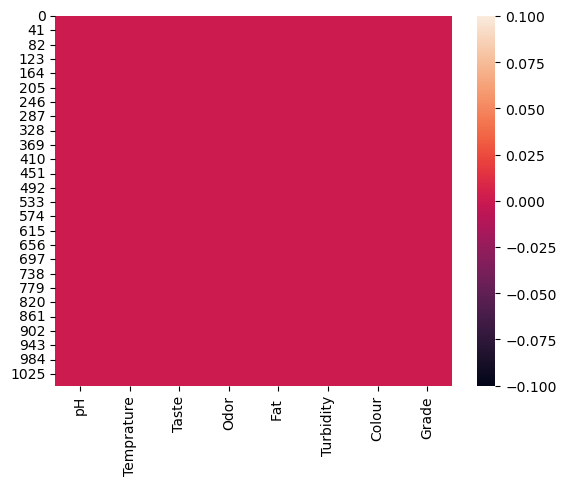

In [15]:
sns.heatmap(df.isnull())

### To check dublicate records

In [16]:
## There are 240 rows are duplicated here
df[df.duplicated()]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


### Checking the count of duplicate value

In [17]:
df.duplicated().sum()

976

### Check each columns unique values

In [18]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('_______________________________________')

pH
[6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]
_______________________________________
Temprature
[35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]
_______________________________________
Taste
[1 0]
_______________________________________
Odor
[0 1]
_______________________________________
Fat 
[1 0]
_______________________________________
Turbidity
[0 1]
_______________________________________
Colour
[254 253 246 255 250 247 245 240 248]
_______________________________________
Grade
['high' 'low' 'medium']
_______________________________________


### Check Each column value Counts

In [19]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('__________________________________________')

pH
6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64
__________________________________________
Temprature
45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64
__________________________________________
Taste
1    579
0    480
Name: Taste, dtype: int64
__________________________________________
Odor
0    601
1    458
Name: Odor, dtype: int64
__________________________________________
Fat 
1    711
0    348
Name: Fat , dtype: int64
__________________________________________
Turbidity
0    539
1    520
Name: Turbidity, dtype: int64
__________________________________________
Colour
255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: Colour, dtyp

### Check the corelations

In [20]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


<AxesSubplot:>

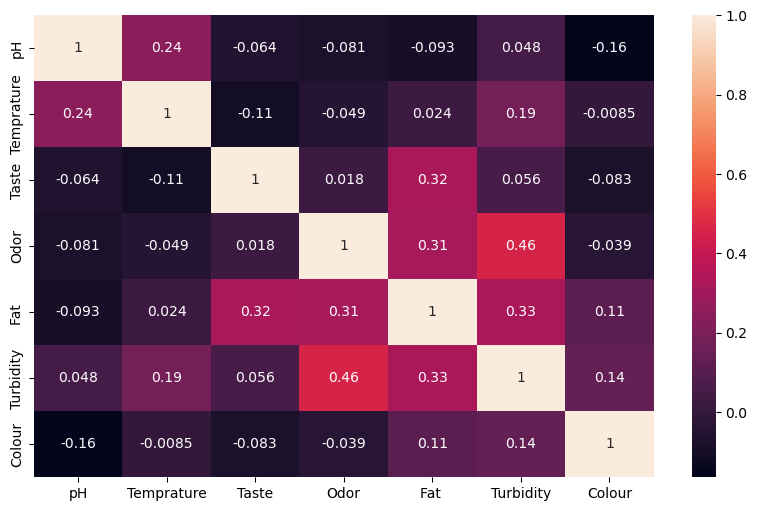

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

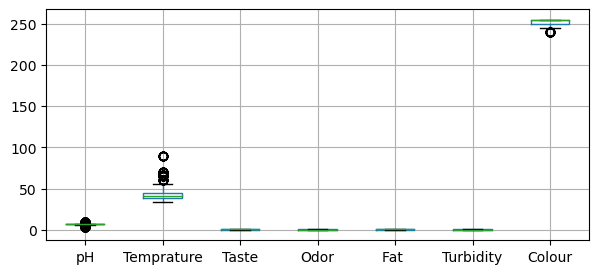

In [22]:
plt.figure(figsize=(7,3))
df.boxplot()

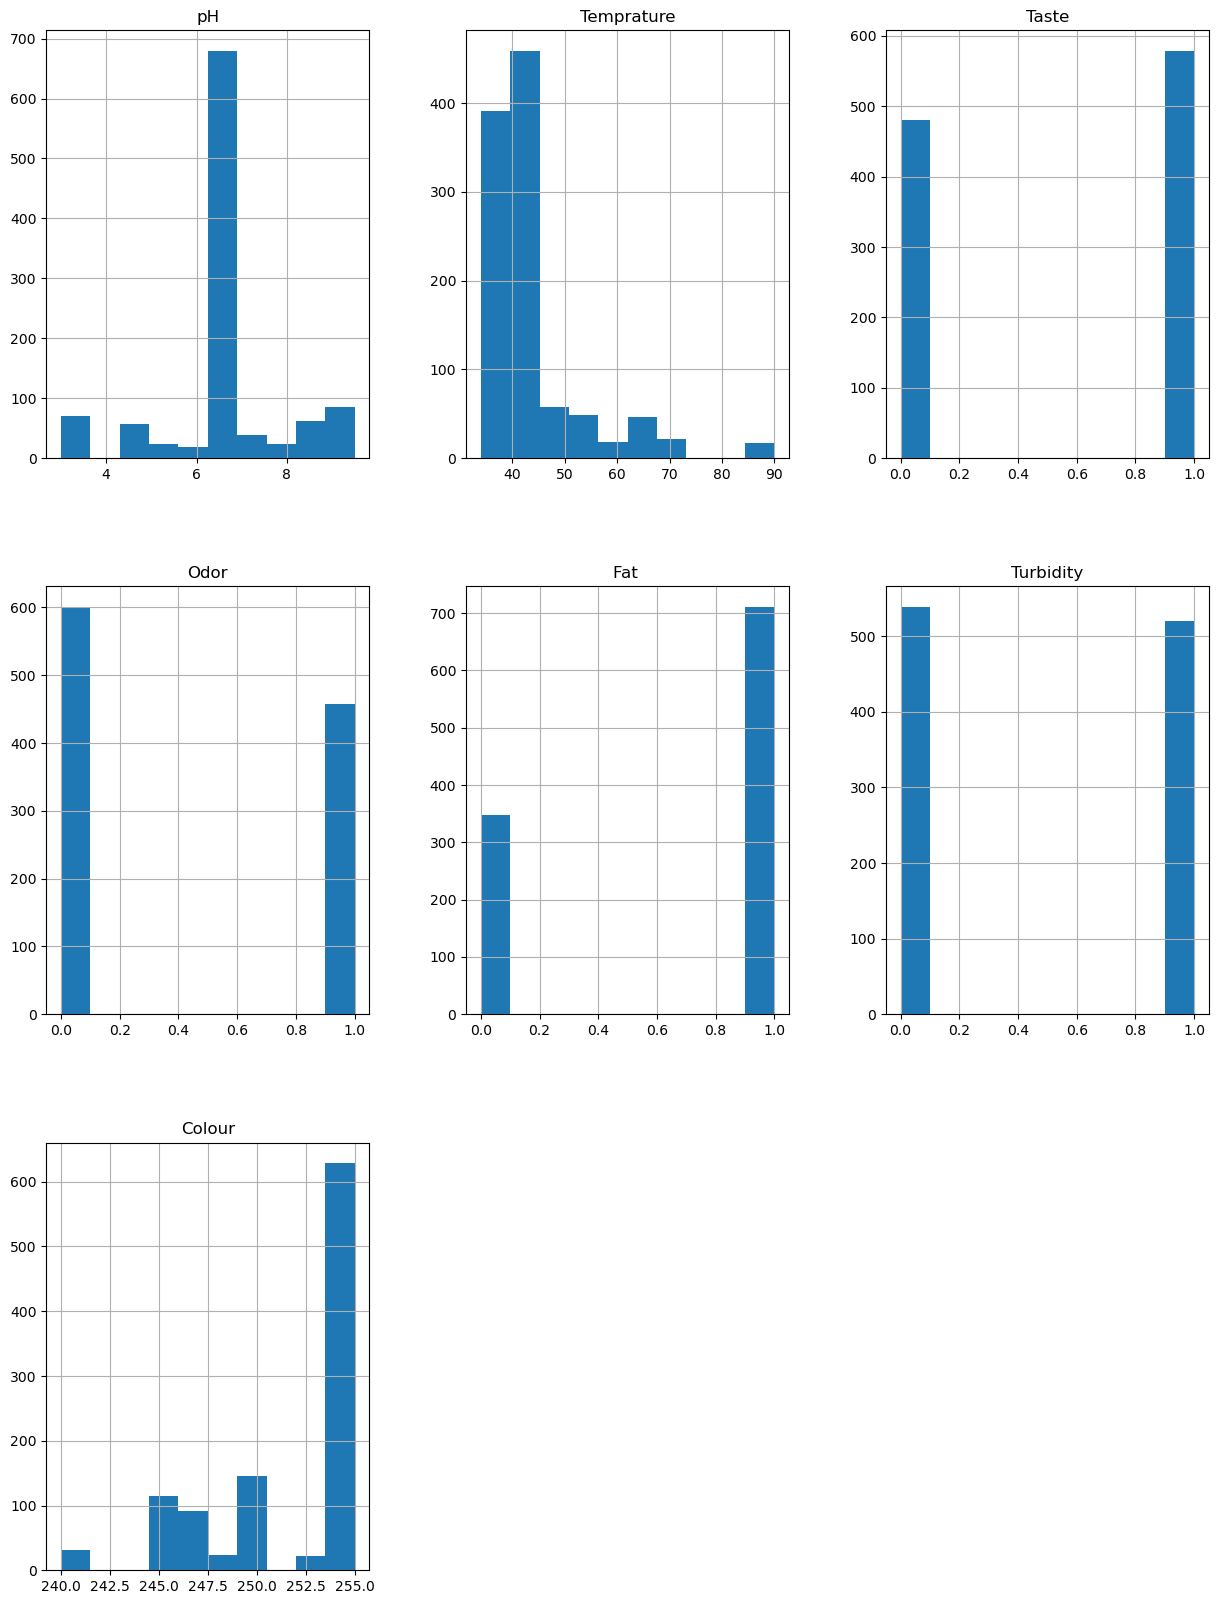

In [23]:
df.hist(figsize=(15,20));

### Countplot

Text(0.5, 1.0, 'Count plot for Milk variants.')

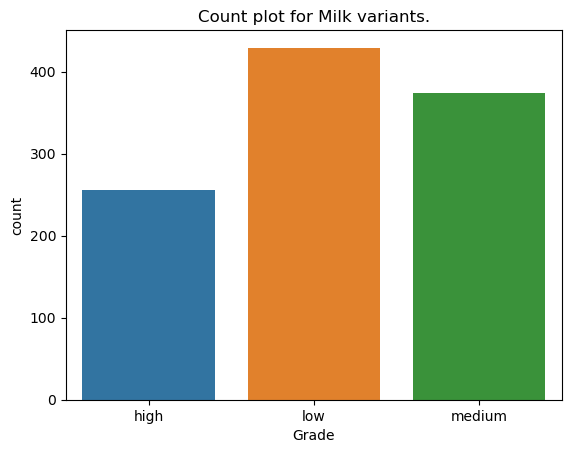

In [24]:
sns.countplot(x='Grade', data=df).set_title('Count plot for Milk variants.')

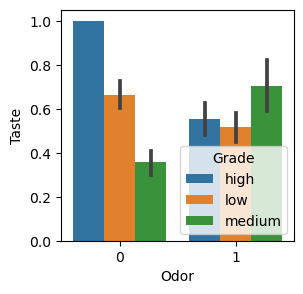

In [25]:
plt.figure(figsize=(3,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=df)
plt.show()

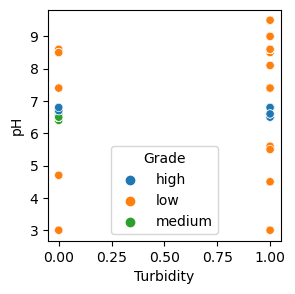

In [26]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=df)
plt.show()

<AxesSubplot:ylabel='Taste'>

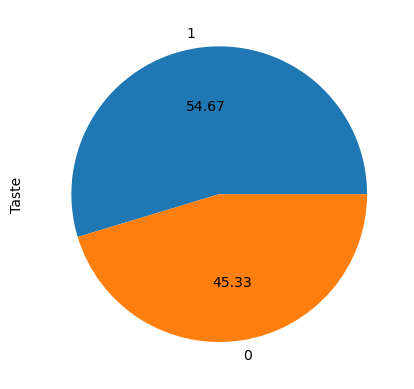

In [27]:
df['Taste'].value_counts().plot(kind='pie',autopct='%.2f')

### Histplot

<AxesSubplot:xlabel='pH', ylabel='Count'>

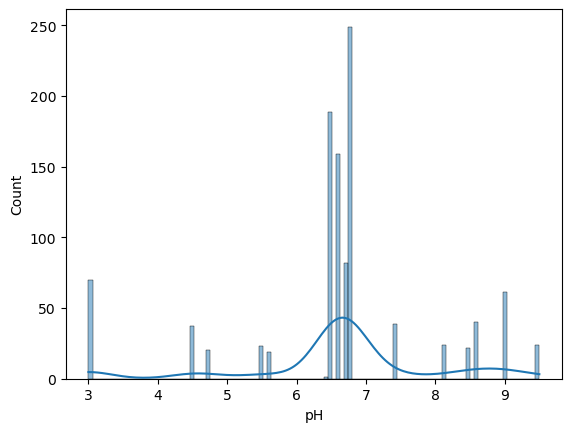

In [28]:
sns.histplot(df['pH'],kde=True)

## Feature Engineering

### Convert categorical feature to numerical feature of Grade

In [29]:
from sklearn import preprocessing

In [30]:
label_encoder = preprocessing.LabelEncoder()

In [31]:
#transform Grade in numerical numbers using label encoder
df['Grade']= label_encoder.fit_transform(df['Grade'])

In [32]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


### Building a Machine Learning Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from xgboost import XGBRegressor

In [34]:
#splinting into train and test 
x= df.drop(['Grade'],axis=1)
y= df['Grade']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [36]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (847, 7)
X Test  :  (212, 7)
Y Train :  (847,)
Y Test  :  (212,)


In [37]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
XGB = XGBRegressor()

In [38]:
li = [LR,DTR,RFR,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,"",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression()  44.84265466163559
DecisionTreeRegressor()  99.20824619061847
RandomForestRegressor()  98.01855691664176
KNeighborsRegressor()  93.9193307439498
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)  98.61448086522984
